# "NLP: Twitter Sentiment Analysis"

Task #1: Understand the Problem Statement and business case

Task #2: Import libraries and datasets

Task #3: Perform Exploratory Data Analysis

Task #4: Plot the WORD CLOUD

Task #5: Perform Data Cleaning

Task #6: Visualize Cleaned Datasets

Task #7: Prepare the data by applying count vectorizer

Task #8: Understand the theory and intuition behind Naive Bayes Classifiers - Part #1

Task #9: Understand the theory and intuition behind Naive Bayes Classifiers - Part #2

Task #10: Understand the theory and intuition behind Naive Bayes classifiers

Task #11: Train a Naive Bayes Classifier

Task #12: Assess trained model performance

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
sentence="Elon Musk has apologized after publicly scoffing at a Twitter employee’s uncertainty about whether he had been laid off in a recent round of cuts and speaking dismissively of the employee’s disability in a series of tweets Monday night.I would like to apologize to Halli for my misunderstanding of his situation. It was based on things I was told that were untrue or, in some cases, true, but not meaningful,” Musk tweeted Tuesday. “He is considering remaining at Twitter"

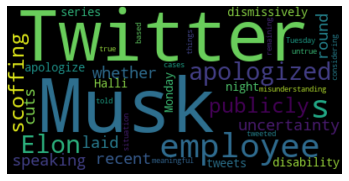

In [3]:
my_cloud=WordCloud().generate(sentence)
plt.imshow(my_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## Task #2: Import libraries and datasets/Analyzing Dataset

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from wordcloud import WordCloud
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [119]:
tweets_df=pd.read_csv("twitter.csv")
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [73]:
tweets_df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [74]:
tweets_df[tweets_df['label']==1].count()

id       2242
label    2242
tweet    2242
dtype: int64

In [75]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 624.3+ KB


In [76]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [77]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [78]:
tweets_df.drop(['id'],axis=1,inplace=True)

In [79]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


## Task #3: Perform Exploratory Data Analysis

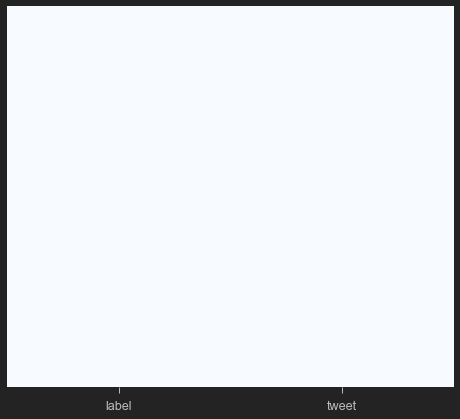

In [80]:
# Wanted to check that is there any NULL values in our dataset

sns.heatmap(tweets_df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1E230B70>]],
      dtype=object)

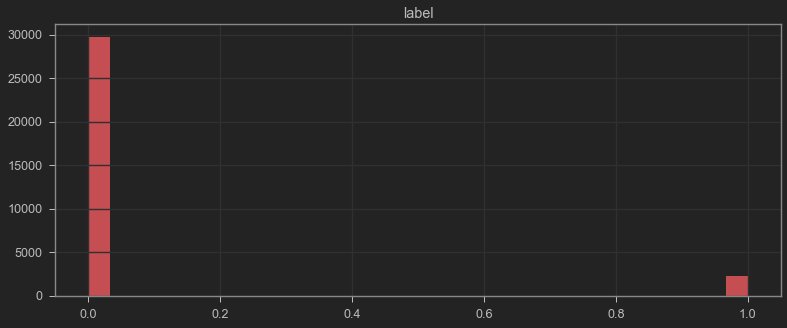

In [81]:
# Plot the histogram
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

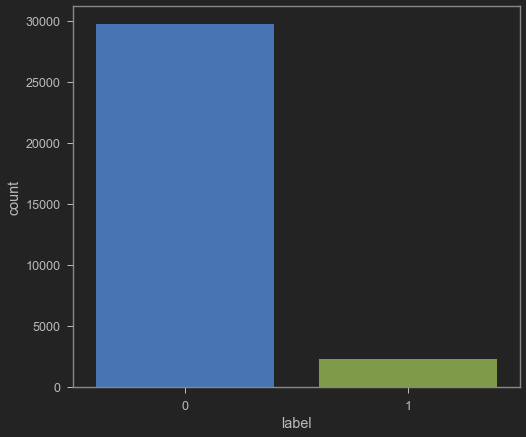

In [82]:
# Plot the CountPlot
sns.countplot(data=tweets_df, x='label') 

In [83]:
# Adding new length column in the dataset
tweets_df['length']=tweets_df['tweet'].apply(len)
tweets_df 

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [84]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [85]:
# Finding out the Tweet which has minimum Value
tweets_df[tweets_df['length']==tweets_df['length'].min()]

,label,tweet,length
25195,0,i love you,11


In [86]:
tweets_df[tweets_df['length']==round(tweets_df['length'].mean())]

,label,tweet,length
115,0,â #under the spell of brexit referendum - c...,85
242,0,make today count! #mondaymotivation #livelifet...,85
384,0,"dream palace, can we move in already? #stellar...",85
573,0,@user monkeys are also declared as vermin. no ...,85
634,0,save thousands $$ free search x logins x broke...,85
...,...,...,...
31393,0,#flagday2016 #flag #day #2016 #(30 #photos) ...,85
31468,0,jts88troxy theater jts88@user ð #love #si...,85
31542,0,stretched to the limit and still #waiting pati...,85
31773,0,this reminds me of this. i am love these two...,85


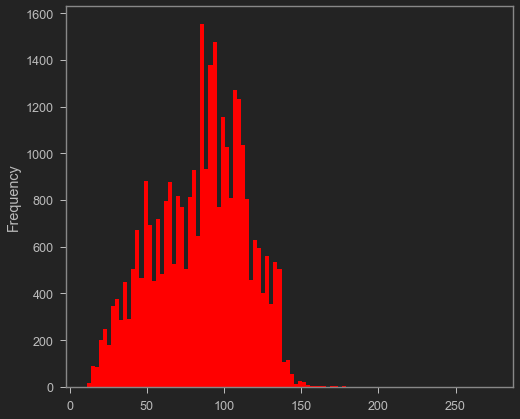

In [87]:
tweets_df['length'].plot(bins=100,kind='hist',color='red')

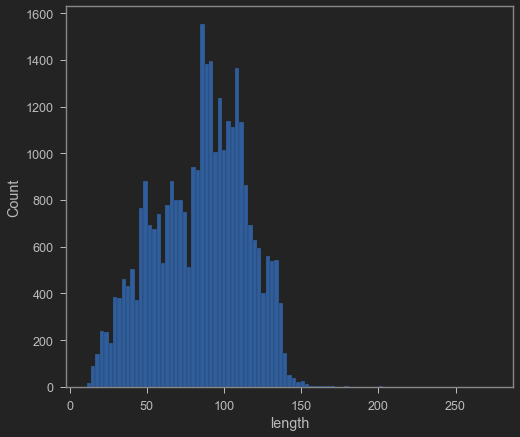

In [88]:
sns.histplot(data=tweets_df,x='length')

## Task #4: Plot the WORD CLOUD

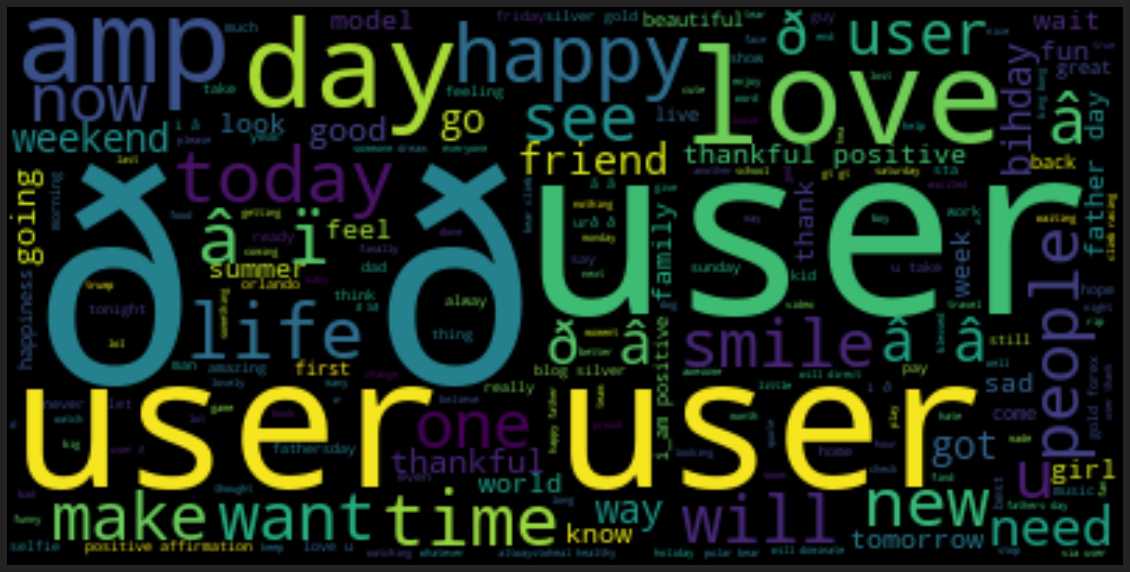

In [120]:
# generating positive cloud by using negative tweets

positive=tweets_df[tweets_df['label']==0] # finding out the positive tweets

positive_tweets=positive['tweet'].to_list() # converting positive tweets into list
all_in_one_positive_tweets=" ".join(positive_tweets) # joining all the list to make a sentence

positive_wordcloud=WordCloud().generate(all_in_one_positive_tweets) # now generating cloud

plt.figure(figsize=(20,20))
plt.imshow(positive_wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


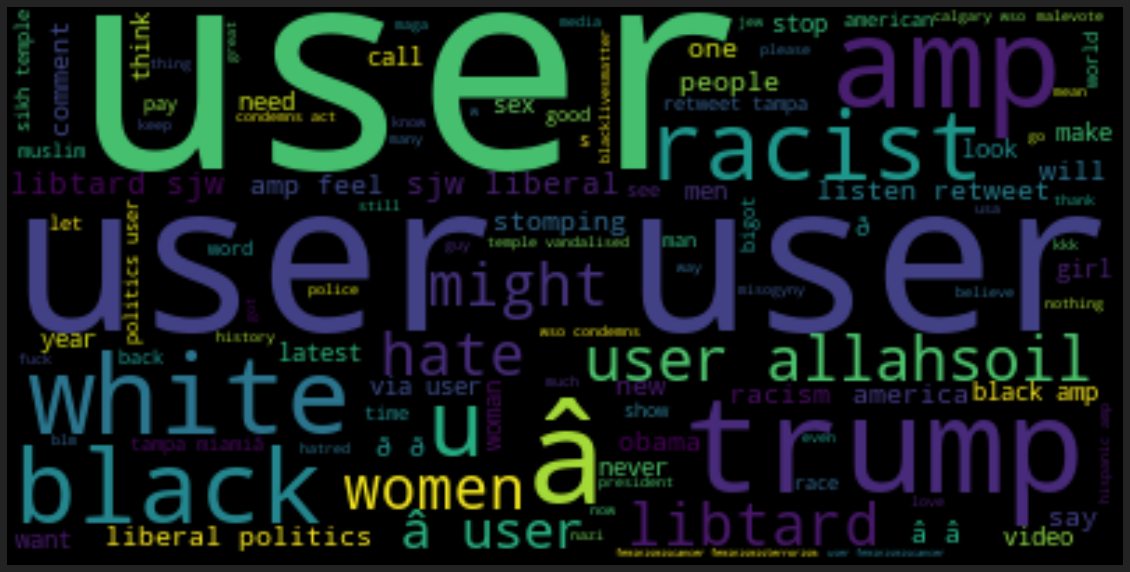

In [121]:
# generating negative cloud by using negative tweets

negative=tweets_df[tweets_df['label']==1] # finding out the negative tweets
negative_tweets=negative['tweet'].tolist() # converting negative tweets into list
all_in_one_negative_tweets=" ".join(negative_tweets) # joining all the list to make a sentence

negative_cloud=WordCloud().generate(all_in_one_negative_tweets) # now generating cloud

plt.figure(figsize=(20,20))
plt.imshow(negative_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## Task #5: Perform Data Cleaning - REMOVE PUNCTUATION FROM TEXT

In [122]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [130]:
new_data=[]
for row in tweets_df['tweet']:    
    new_data.append(row.translate(str.maketrans('', '', string.punctuation)))
tweets_df['tweet']=new_data
tweets_df
    



,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate user isz that youuuðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,user sikh temple vandalised in in calgary wso ...


In [129]:
new_data[0]

' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run'